
# Graphs from a set of lines

Each line is a node and intersection topology is turned into edges. One of the options how this is
used for street network analysis is an angular analysis, where your routing
is weighted via angles between street segments on intersections.

In [2]:
import geopandas
import matplotlib.pyplot as plt
import momepy
import networkx as nx
from contextily import add_basemap
from libpysal import weights

c:\Users\Sneez\Desktop\Snowplowing\Snowplow-Routing-Code\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


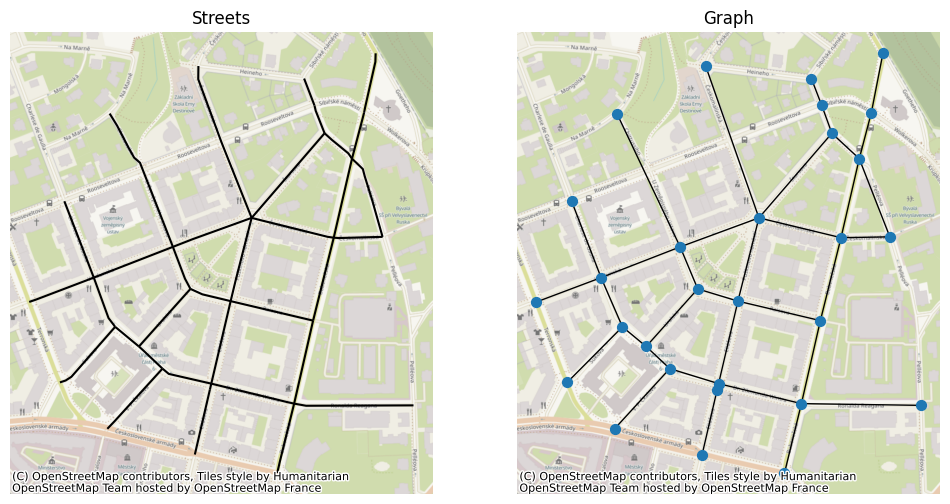

In [3]:
# Read in example street network from GeoPackage
streets = geopandas.read_file(momepy.datasets.get_path("bubenec"), layer="streets")

# Construct the primal graph
G_primal = momepy.gdf_to_nx(streets, approach="primal")

# Plot
f, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
streets.plot(color="k", ax=ax[0])
for i, facet in enumerate(ax):
    facet.set_title(("Streets", "Graph")[i])
    facet.axis("off")
    add_basemap(facet)
nx.draw(
    G_primal, {n: [n[0], n[1]] for n in list(G_primal.nodes)}, ax=ax[1], node_size=50
)

Construct the dual graph. momepy will store row attributes as node attributes and
automatically measures angle between lines.



c:\Users\Sneez\Desktop\Snowplowing\Snowplow-Routing-Code\.venv\Lib\site-packages\momepy\utils.py:99: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  sw = libpysal.weights.Queen.from_dataframe(gdf_network, silence_warnings=True)


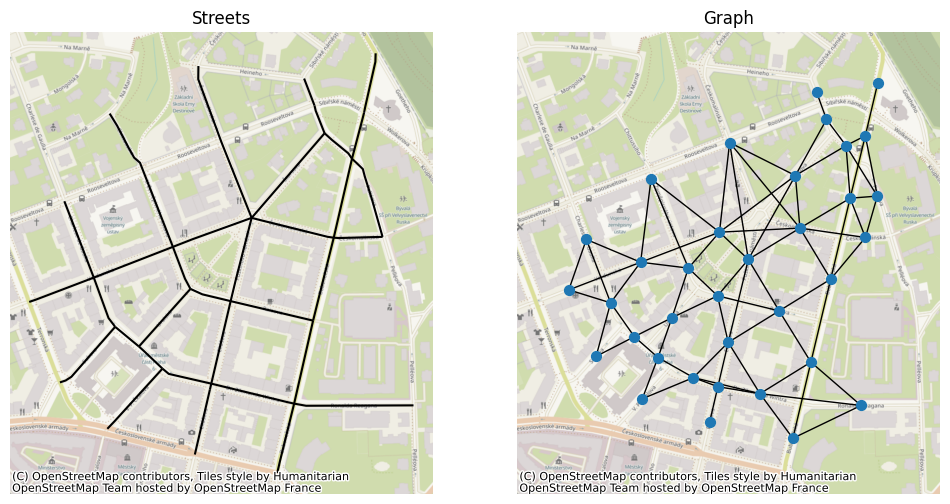

In [4]:
G_dual = momepy.gdf_to_nx(streets, approach="dual")

# Plot
f, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
streets.plot(color="k", ax=ax[0])
for i, facet in enumerate(ax):
    facet.set_title(("Streets", "Graph")[i])
    facet.axis("off")
    add_basemap(facet)
nx.draw(G_dual, {n: [n[0], n[1]] for n in list(G_dual.nodes)}, ax=ax[1], node_size=50)
plt.show()

# Convert dual graph back to GeoDataFrame. Returns only original line geometry.
lines = momepy.nx_to_gdf(G_dual)

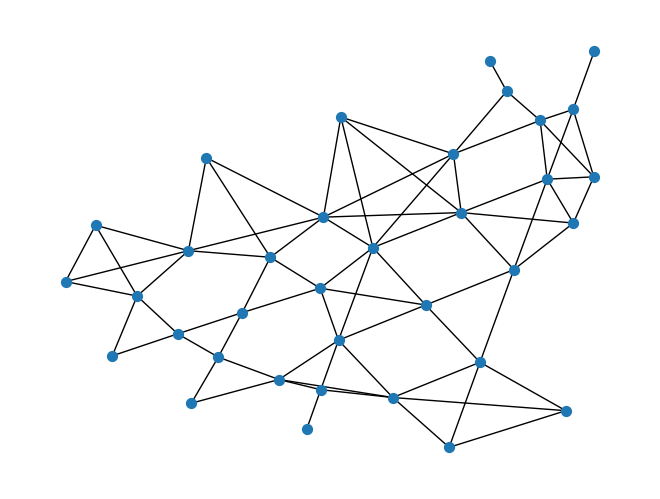

In [10]:
nx.draw(G_dual, {n: [n[0], n[1]] for n in list(G_dual.nodes)}, node_size=50)
plt.show()

In [12]:
for node in G_dual.nodes(data=True):
    print(node)
for edge in G_dual.edges(data=True):
    print(edge)

((1603499.42326969, 6464328.7520580515), {'geometry': <LINESTRING (1603585.64 6464428.774, 1603413.206 6464228.73)>, 'mm_len': 264.1039496246775})
((1603510.1061735682, 6464204.555117119), {'geometry': <LINESTRING (1603607.303 6464181.853, 1603592.887 6464183.935, 1603433.878 6...>, 'mm_len': 199.74650338337847})
((1603343.9298546757, 6464406.88068147), {'geometry': <LINESTRING (1603287.304 6464587.705, 1603286.881 6464556.602, 1603337.598 6...>, 'mm_len': 382.50195042922803})
((1603388.107330868, 6464130.37588574), {'geometry': <LINESTRING (1603363.558 6464031.885, 1603376.504 6464085.53, 1603413.206 64...>, 'mm_len': 203.01409000575802})
((1603319.9151092004, 6464194.889219048), {'geometry': <LINESTRING (1603413.206 6464228.73, 1603274.458 6464178.659, 1603226.958 64...>, 'mm_len': 198.48272399064462})
((1603572.9509162016, 6464461.390138135), {'geometry': <LINESTRING (1603561.74 6464494.467, 1603564.634 6464481.988, 1603585.64 646...>, 'mm_len': 70.02020232495668})
((1603619.1146899